In [41]:
import requests
api_key = 'gjdlErOwKJezSEkcBXev5u3hl2gJ9fzrShp6LGDM'
url = "https://api.eia.gov/v2/natural-gas/cons/sum/data/?api_key=gjdlErOwKJezSEkcBXev5u3hl2gJ9fzrShp6LGDM"

# Initialize variables
offset = 0
all_data = []
response = None

while True:
    params = {
        'length': 5000,  # Request up to 5000 rows
        'offset': offset,  # Specify the current offset
    }

    # Make the API request
    full_url = 'https://api.eia.gov/v2/electricity/rto/daily-fuel-type-data/data/?frequency=daily&data[0]=value&facets[respondent][]=LDWP&facets[respondent][]=ISNE&facets[fueltype][]=COL&facets[fueltype][]=NG&start=2020-01-01&end=2024-11-21&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key=gjdlErOwKJezSEkcBXev5u3hl2gJ9fzrShp6LGDM'
    #response = requests.get(url, params=params)
    response = requests.get(full_url, params)
    print(response.json())
    if response.status_code == 200:
        if response.json()['response']['data']:
            data = response.json()
            all_data.extend(data['response']['data'])  # Collect the data
            print(f"Retrieved {len(data['response']['data'])} items, moving to offset {offset + 5000}.")
            offset += 5000  # Increment offset for the next request
        else:
            print("No more data available.")
            break  # Exit the loop if no more data is returned
    else:
        print(f"Error: {response.status_code} - {response.text}")
        break  # Exit the loop if an error occurs

# Final output
print(f"Total items retrieved: {len(all_data)}")


{'response': {'warnings': [{'warning': 'incomplete return', 'description': 'The API can only return 5000 rows in JSON format.  Please consider constraining your request with facet, start, or end, or using offset to paginate results.'}], 'total': '35283', 'dateFormat': 'YYYY-MM-DD', 'frequency': 'daily', 'data': [{'period': '2024-11-21', 'respondent': 'ISNE', 'respondent-name': 'ISO New England', 'fueltype': 'NG', 'type-name': 'Natural Gas', 'timezone': 'Arizona', 'timezone-description': 'Arizona', 'value': '198810', 'value-units': 'megawatthours'}, {'period': '2024-11-21', 'respondent': 'ISNE', 'respondent-name': 'ISO New England', 'fueltype': 'NG', 'type-name': 'Natural Gas', 'timezone': 'Central', 'timezone-description': 'Central', 'value': '198810', 'value-units': 'megawatthours'}, {'period': '2024-11-21', 'respondent': 'ISNE', 'respondent-name': 'ISO New England', 'fueltype': 'NG', 'type-name': 'Natural Gas', 'timezone': 'Eastern', 'timezone-description': 'Eastern', 'value': '20027

In [42]:
import pandas as pd

In [43]:
df = pd.DataFrame(all_data)

In [44]:
df.head()

period respondent  respondent-name fueltype    type-name  timezone  \
0  2024-11-21       ISNE  ISO New England       NG  Natural Gas   Arizona   
1  2024-11-21       ISNE  ISO New England       NG  Natural Gas   Central   
2  2024-11-21       ISNE  ISO New England       NG  Natural Gas   Eastern   
3  2024-11-21       ISNE  ISO New England       NG  Natural Gas  Mountain   
4  2024-11-21       ISNE  ISO New England       NG  Natural Gas   Pacific   

  timezone-description   value    value-units  
0              Arizona  198810  megawatthours  
1              Central  198810  megawatthours  
2              Eastern  200272  megawatthours  
3             Mountain  198810  megawatthours  
4              Pacific  198810  megawatthours

In [83]:
ne_df = df[df['respondent'] == 'ISNE']
la_df = df[df['respondent'] == 'LDWP']

In [84]:
ne_natural_df = ne_df[ne_df['fueltype'] == 'NG']
la_natural_df = la_df[la_df['fueltype'] == 'NG']
ne_coal_df = ne_df[ne_df['fueltype'] == 'COL']
la_coal_df = la_df[la_df['fueltype'] == 'COL']

In [85]:
ne_natural_df = ne_natural_df[ne_natural_df['timezone'] == 'Eastern']
la_natural_df = la_natural_df[la_natural_df['timezone'] == 'Pacific']
ne_coal_df = ne_coal_df[ne_coal_df['timezone'] == 'Eastern']
la_coal_df = la_coal_df[la_coal_df['timezone'] == 'Pacific']

In [86]:
import matplotlib.pyplot as plt

In [87]:
ne_natural_df.head()

period respondent  respondent-name fueltype    type-name timezone  \
2   2024-11-21       ISNE  ISO New England       NG  Natural Gas  Eastern   
17  2024-11-20       ISNE  ISO New England       NG  Natural Gas  Eastern   
33  2024-11-19       ISNE  ISO New England       NG  Natural Gas  Eastern   
53  2024-11-18       ISNE  ISO New England       NG  Natural Gas  Eastern   
68  2024-11-17       ISNE  ISO New England       NG  Natural Gas  Eastern   

   timezone-description   value    value-units  
2               Eastern  200272  megawatthours  
17              Eastern  197021  megawatthours  
33              Eastern  175081  megawatthours  
53              Eastern  169011  megawatthours  
68              Eastern  156379  megawatthours

In [88]:
ne_coal_df.head()

period respondent  respondent-name fueltype type-name timezone  \
30   2024-11-19       ISNE  ISO New England      COL      Coal  Eastern   
48   2024-11-18       ISNE  ISO New England      COL      Coal  Eastern   
96   2024-11-15       ISNE  ISO New England      COL      Coal  Eastern   
114  2024-11-14       ISNE  ISO New England      COL      Coal  Eastern   
134  2024-11-13       ISNE  ISO New England      COL      Coal  Eastern   

    timezone-description value    value-units  
30               Eastern    17  megawatthours  
48               Eastern    16  megawatthours  
96               Eastern    64  megawatthours  
114              Eastern    60  megawatthours  
134              Eastern    92  megawatthours

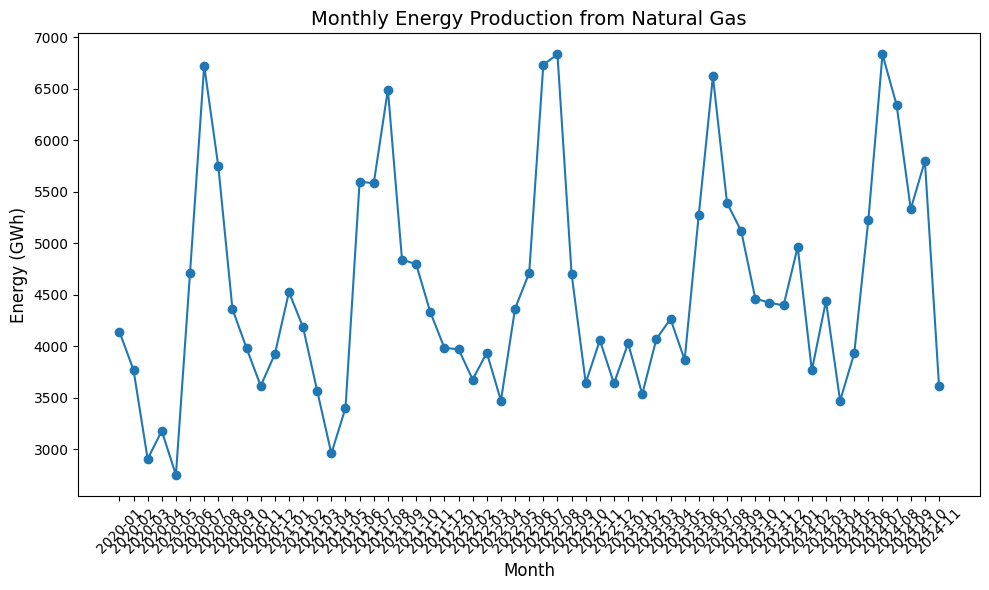

In [89]:
ne_natural_df['period'] = pd.to_datetime(ne_natural_df['period'])
ne_natural_df['value'] = ne_natural_df['value'].astype(float)
ne_natural_df['month'] = ne_natural_df['period'].dt.to_period('M')
monthly_data = ne_natural_df.groupby('month')['value'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['month'].astype(str), monthly_data['value'] / 1000, marker='o', linestyle='-')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)  # Simplify to Gigawatt-hours (GWh)
plt.title('Monthly Energy Production from Natural Gas', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

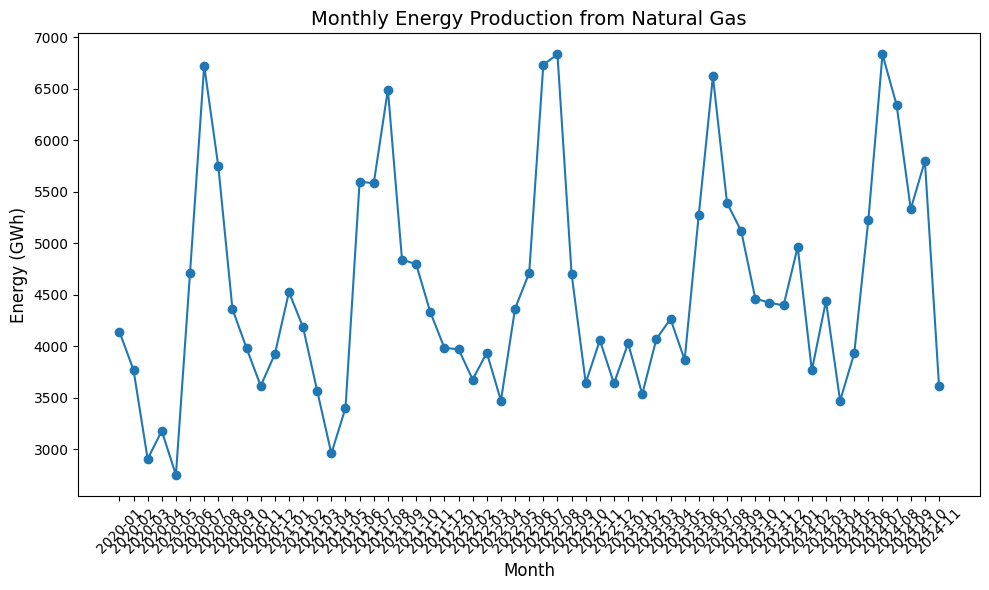

In [90]:
la_natural_df['period'] = pd.to_datetime(la_natural_df['period'])
la_natural_df['value'] = la_natural_df['value'].astype(float)
la_natural_df['month'] = la_natural_df['period'].dt.to_period('M')
monthly_la_data = la_natural_df.groupby('month')['value'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['month'].astype(str), monthly_data['value'] / 1000, marker='o', linestyle='-')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)  # Simplify to Gigawatt-hours (GWh)
plt.title('Monthly Energy Production from Natural Gas', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

In [91]:
ne_coal_df.loc['value'] = ne_coal_df['value'].astype(float)
ne_coal_df['value'].dtype

dtype('O')

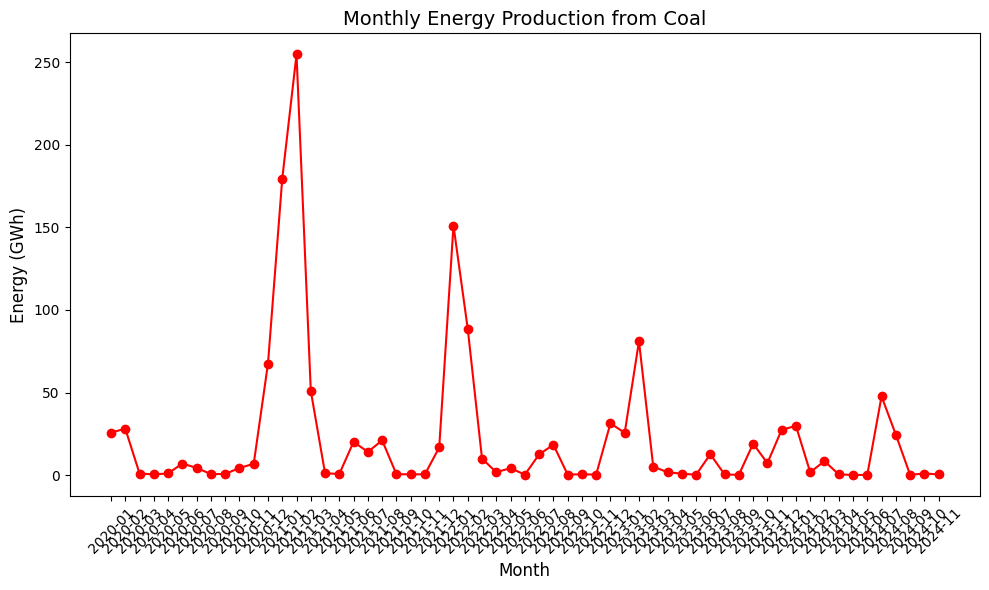

In [92]:
ne_coal_df.loc[:, 'period'] = pd.to_datetime(ne_coal_df['period']).dropna()
ne_coal_df['period'] = pd.to_datetime(ne_coal_df['period'])
ne_coal_df['month'] = ne_coal_df['period'].dt.to_period('M')
ne_coal_df['value'] = ne_coal_df['value'].astype(float)
# ne_coal_df['value']=ne_coal_df['value'].dropna()

monthly_coal_data = ne_coal_df.groupby('month')['value'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_coal_data['month'].astype(str), monthly_coal_data['value'] / 1000, marker='o', linestyle='-', color='red')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)  # Convert from megawatthours to gigawatthours
plt.title('Monthly Energy Production from Coal', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [93]:

la_coal_df.head()

period respondent                            respondent-name fueltype  \
9   2024-11-21       LDWP  Los Angeles Department of Water and Power      COL   
24  2024-11-20       LDWP  Los Angeles Department of Water and Power      COL   
40  2024-11-19       LDWP  Los Angeles Department of Water and Power      COL   
60  2024-11-18       LDWP  Los Angeles Department of Water and Power      COL   
75  2024-11-17       LDWP  Los Angeles Department of Water and Power      COL   

   type-name timezone timezone-description  value    value-units  
9       Coal  Pacific              Pacific  19202  megawatthours  
24      Coal  Pacific              Pacific  19789  megawatthours  
40      Coal  Pacific              Pacific  18235  megawatthours  
60      Coal  Pacific              Pacific  15436  megawatthours  
75      Coal  Pacific              Pacific      0  megawatthours

In [94]:
la_coal_df.loc[:, 'period'] = pd.to_datetime(la_coal_df['period']).dropna()
la_coal_df.loc[:, 'period'] = pd.to_datetime(la_coal_df['period'])
pd.to_datetime(la_coal_df['period']).dtype

dtype('<M8[ns]')

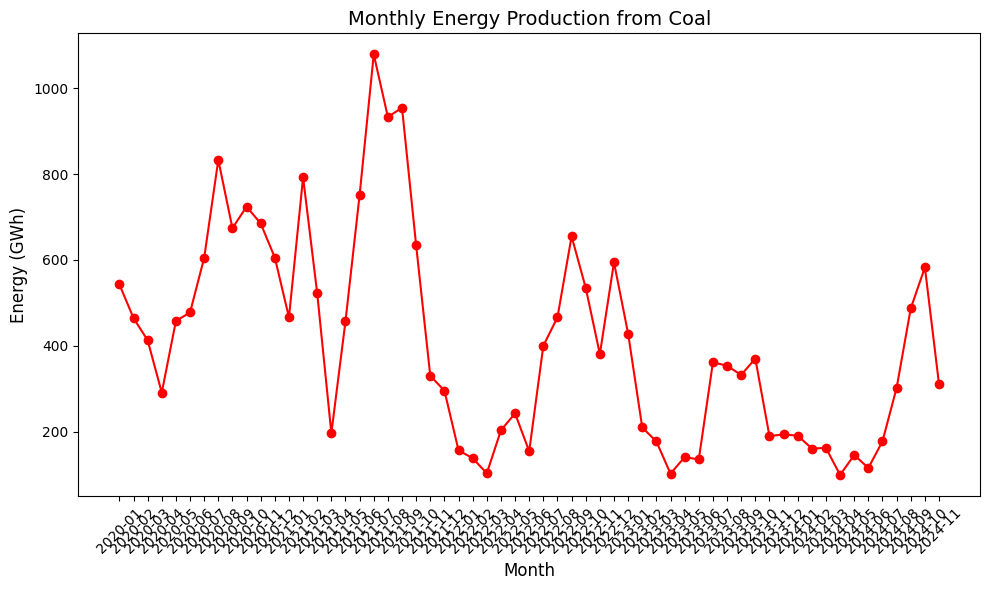

In [95]:
la_coal_df.loc[:, 'period'] = pd.to_datetime(la_coal_df['period']).dropna()
la_coal_df['period'] = pd.to_datetime(la_coal_df['period'])
la_coal_df['month'] = la_coal_df['period'].dt.to_period('M')

la_coal_df.loc[:, 'value'] = la_coal_df['value'].astype(float)

la_monthly_coal_data = la_coal_df.groupby('month')['value'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(la_monthly_coal_data['month'].astype(str), la_monthly_coal_data['value'] / 1000, marker='o', linestyle='-', color='red')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)  # Convert from megawatthours to gigawatthours
plt.title('Monthly Energy Production from Coal', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

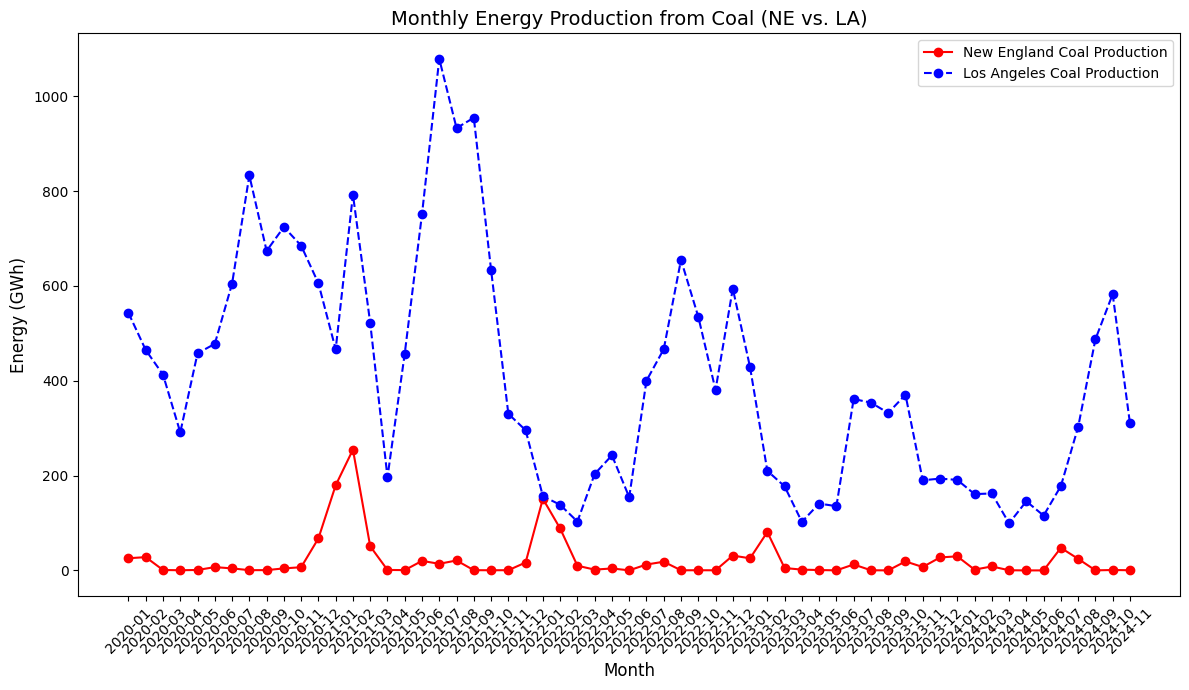

In [96]:
plt.figure(figsize=(12, 7))

plt.plot(monthly_coal_data['month'].astype(str), monthly_coal_data['value'] / 1000,
         marker='o', linestyle='-', color='red', label='New England Coal Production')

plt.plot(la_monthly_coal_data['month'].astype(str), la_monthly_coal_data['value'] / 1000,
         marker='o', linestyle='--', color='blue', label='Los Angeles Coal Production')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)  # Convert from megawatthours to gigawatthours
plt.title('Monthly Energy Production from Coal (NE vs. LA)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

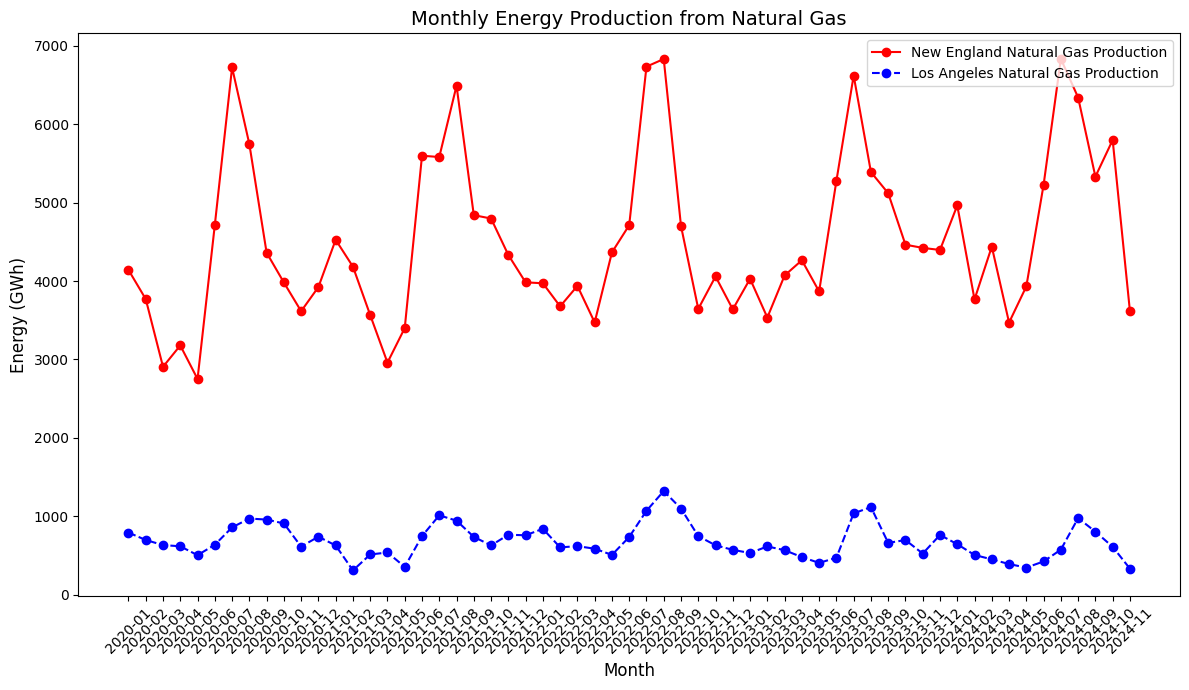

In [97]:
plt.figure(figsize=(12, 7))
plt.plot(monthly_data['month'].astype(str), monthly_data['value'] / 1000, marker='o', linestyle='-',
         color='red', label='New England Natural Gas Production')

plt.plot(monthly_la_data['month'].astype(str), monthly_la_data['value'] / 1000,
         marker='o', linestyle='--', color='blue', label='Los Angeles Natural Gas Production')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)
plt.title('Monthly Energy Production from Natural Gas', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

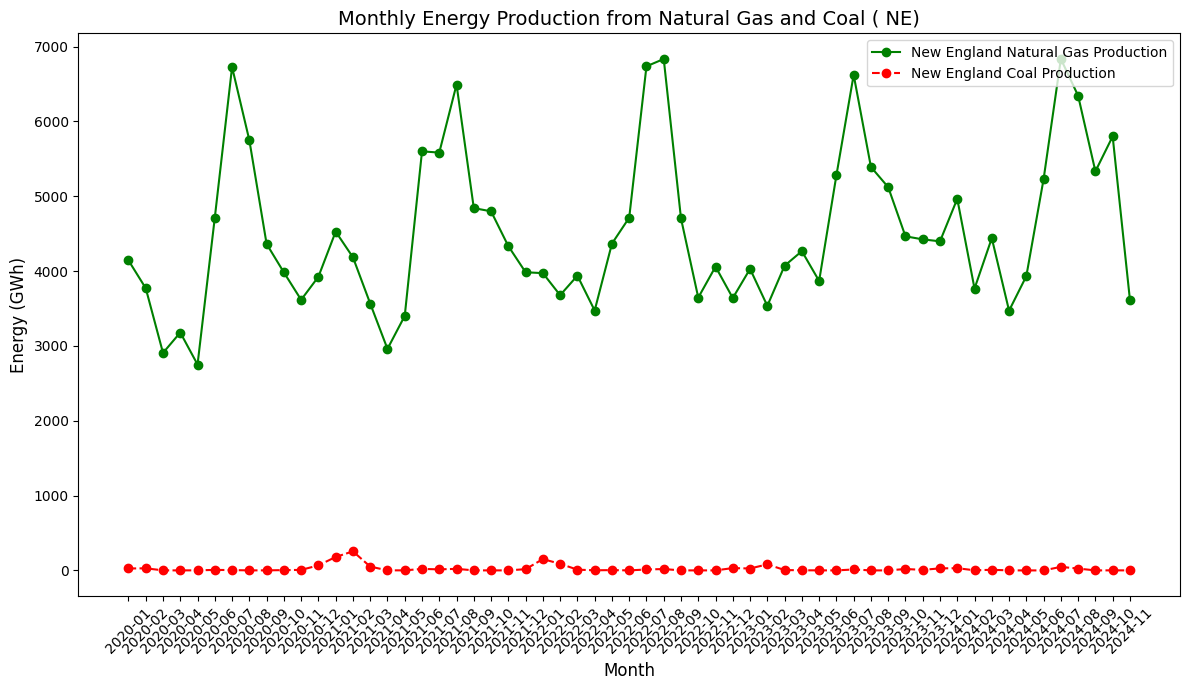

In [98]:
plt.figure(figsize=(12, 7))
plt.plot(monthly_data['month'].astype(str), monthly_data['value'] / 1000, marker='o', linestyle='-',
         color='green', label='New England Natural Gas Production')

plt.plot(monthly_coal_data['month'].astype(str), monthly_coal_data['value'] / 1000,
         marker='o', linestyle='--', color='red', label='New England Coal Production')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)
plt.title('Monthly Energy Production from Natural Gas and Coal ( NE)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

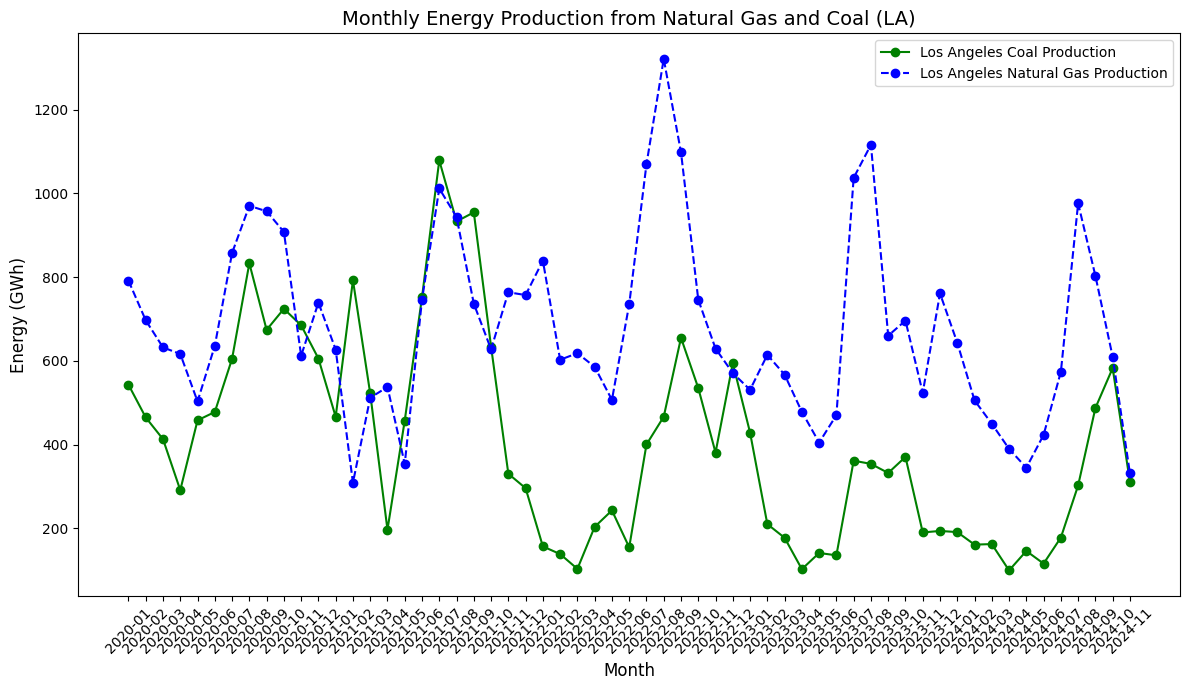

In [99]:
plt.figure(figsize=(12, 7))
plt.plot(la_monthly_coal_data['month'].astype(str), la_monthly_coal_data['value'] / 1000,
         marker='o', linestyle='-', color='green', label='Los Angeles Coal Production')

plt.plot(monthly_la_data['month'].astype(str), monthly_la_data['value'] / 1000,
         marker='o', linestyle='--', color='blue', label='Los Angeles Natural Gas Production')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Energy (GWh)', fontsize=12)
plt.title('Monthly Energy Production from Natural Gas and Coal (LA)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()